<a href="https://colab.research.google.com/github/nasibehmohammadi/Thesis/blob/main/1GRU_d4(UCIp_balance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = "/content/UCIP_balanced.csv"
df = pd.read_csv(file_path)

print("🔍 بررسی ۵ سطر اول دیتاست:")
print(df.head())

feature_columns = ["B","C"]
target_column = "A"

X_data = df[feature_columns].values
y_data = df[target_column].values

num_features = X_data.shape[1]

time_steps = 10
X_sequences = []
y_sequences = []

for i in range(len(X_data) - time_steps):
    X_sequences.append(X_data[i : i + time_steps])
    y_sequences.append(y_data[i + time_steps])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = X_train.reshape(-1, num_features)
X_test = X_test.reshape(-1, num_features)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(-1, time_steps, num_features)
X_test = X_test.reshape(-1, time_steps, num_features)

model = Sequential([
    GRU(64, return_sequences=True, input_shape=(time_steps, num_features)),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ دقت مدل روی داده‌های تست: {accuracy * 100:.2f}%")

test_sample = X_test[0].reshape(1, time_steps, num_features)
prediction = model.predict(test_sample)

if prediction > 0.5:
    print("🚨 ورود مشکوک! نیاز به احراز هویت بیشتر.")
else:
    print("✅ ورود ایمن است.")

🔍 بررسی ۵ سطر اول دیتاست:
     A         B         C
0  0.0  0.329245  0.278209
1  1.0  0.329245  0.723151
2  1.0  0.283796  0.874008
3  1.0  0.283796  0.874008
4  1.0  0.283796  0.874008


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 70s 18ms/step - accuracy: 0.9815 - loss: 0.0875 - val_accuracy: 0.9867 - val_loss: 0.0617
Epoch 2/10
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 63s 18ms/step - accuracy: 0.9865 - loss: 0.0635 - val_accuracy: 0.9868 - val_loss: 0.0617
Epoch 3/10
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 68s 20ms/step - accuracy: 0.9863 - loss: 0.0639 - val_accuracy: 0.9868 - val_loss: 0.0631
Epoch 4/10
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 79s 19ms/step - accuracy: 0.9863 - loss: 0.0635 - val_accuracy: 0.9868 - val_loss: 0.0617
Epoch 5/10
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9862 - loss: 0.0640 - val_accuracy: 0.9868 - val_loss: 0.0617
Epoch 6/10
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9864 - loss: 0.0632 - val_accuracy: 0.9868 - val_loss: 0.0618
Epoch 7/10
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 79s 18ms/step - accuracy: 0.9866 - loss: 0.0627 - val_accuracy: 0.9868 - val_loss: 0.0621
Epoch 8/10
3486/3486 ━━━━━━━━━━━━━━━━━━━━ 64s 18ms/step - accuracy: 0.9863 -

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import f1_score

# 1️⃣ پیش‌بینی بر روی مجموعه تست
y_pred = model.predict(X_test)

# 2️⃣ تبدیل احتمالات به برچسب‌های 0 و 1 (اگر مقدار احتمال > 0.5 باشد، کلاس 1 است، در غیر این صورت 0)
y_pred_classes = (y_pred > 0.5).astype(int)

# 3️⃣ محاسبه F1-Score
f1 = f1_score(y_test, y_pred_classes)

print(f"🎯 F1-Score مدل: {f1:.4f}")


872/872 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
🎯 F1-Score مدل: 0.9871


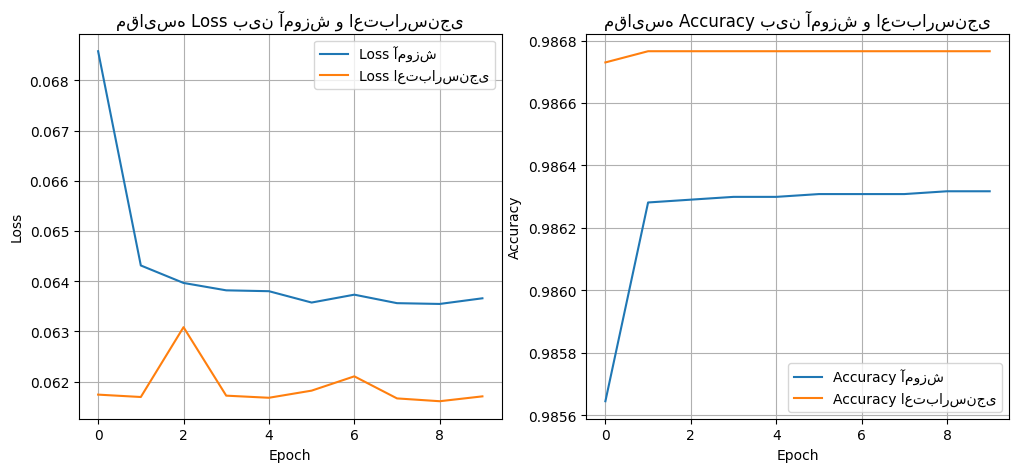

In [ ]:
import matplotlib.pyplot as plt

# 📊 رسم نمودار Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss آموزش')
plt.plot(history.history['val_loss'], label='Loss اعتبارسنجی')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('مقایسه Loss بین آموزش و اعتبارسنجی')
plt.legend()
plt.grid()

# 📊 رسم نمودار Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy آموزش')
plt.plot(history.history['val_accuracy'], label='Accuracy اعتبارسنجی')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('مقایسه Accuracy بین آموزش و اعتبارسنجی')
plt.legend()
plt.grid()

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


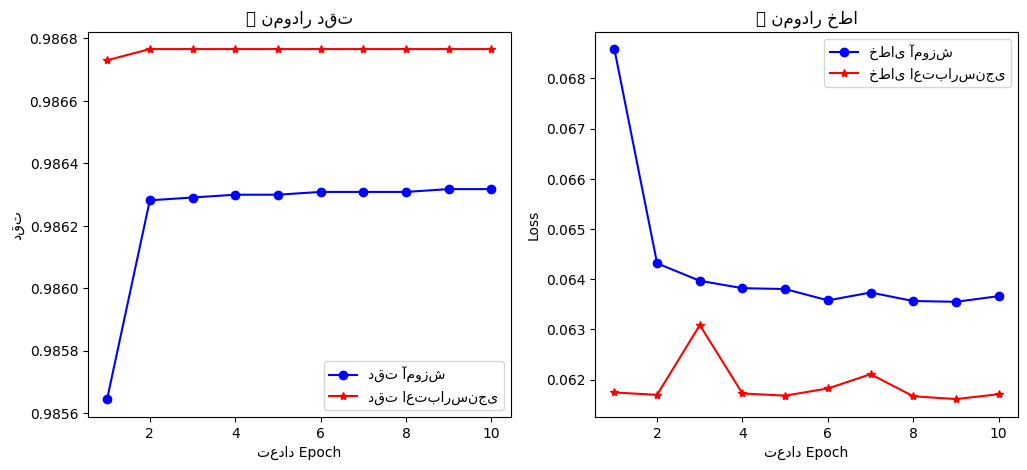

✅ بیش‌برازش رخ نداده است. مدل به خوبی روی داده‌های اعتبارسنجی تعمیم یافته است.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def check_overfitting(history, threshold=0.05):
    """
    بررسی بیش‌برازش (Overfitting) با مقایسه دقت و خطای داده‌های آموزشی و اعتبارسنجی.

    - history: شیء History که از model.fit() به دست می‌آید.
    - threshold: آستانه‌ای که اگر اختلاف loss از آن بیشتر شود، مدل را بیش‌برازش در نظر می‌گیریم.
    """

    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # محاسبه اختلاف دقت و خطا بین داده‌های آموزشی و اعتبارسنجی
    acc_gap = np.abs(np.array(train_acc) - np.array(val_acc))
    loss_gap = np.abs(np.array(train_loss) - np.array(val_loss))

    # بررسی آیا بیش‌برازش رخ داده است؟
    overfitting_detected = np.any(loss_gap > threshold)

    # 📈 رسم نمودار دقت و خطا
    epochs = range(1, len(train_acc) + 1)

    plt.figure(figsize=(12, 5))

    # 📊 نمودار دقت
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_acc, 'bo-', label='دقت آموزش')
    plt.plot(epochs, val_acc, 'r*-', label='دقت اعتبارسنجی')
    plt.xlabel('تعداد Epoch')
    plt.ylabel('دقت')
    plt.title('📊 نمودار دقت')
    plt.legend()

    # 📊 نمودار خطا (Loss)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, 'bo-', label='خطای آموزش')
    plt.plot(epochs, val_loss, 'r*-', label='خطای اعتبارسنجی')
    plt.xlabel('تعداد Epoch')
    plt.ylabel('Loss')
    plt.title('📊 نمودار خطا')
    plt.legend()

    plt.show()

    # 🛑 نمایش نتیجه
    if overfitting_detected:
        print("⚠️ بیش‌برازش (Overfitting) رخ داده است! مدل روی داده‌های آموزشی خیلی خوب عمل کرده اما روی داده‌های اعتبارسنجی عملکرد ضعیف‌تری دارد.")
    else:
        print("✅ بیش‌برازش رخ نداده است. مدل به خوبی روی داده‌های اعتبارسنجی تعمیم یافته است.")

# 📌 استفاده از تابع برای بررسی مدل
check_overfitting(history)
